<a href="https://colab.research.google.com/github/ridaali28/Chest-Xray-CNN/blob/main/Chest_XRAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p  ~/.kaggle
!cp kaggle.json ~/.kaggle/

#permissions
!chmod 600 ~/.kaggle//kaggle.json

In [2]:
!kaggle datasets download -d tolgadincer/labeled-chest-xray-images

 99% 1.16G/1.17G [00:14<00:00, 91.0MB/s]
100% 1.17G/1.17G [00:14<00:00, 88.9MB/s]


In [3]:
from zipfile import ZipFile
path="/content/labeled-chest-xray-images.zip"
with ZipFile(path,'r') as zip:
  zip.extractall()
  print("done")

done


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import random
import cv2

In [5]:
dir=r"/content/chest_xray"
category=["NORMAL","PNEUMONIA"]
folders=["test","train"]
img_size=50
train_data=[]
test_data=[]

for fold in folders:
 folder=os.path.join(dir,fold)
 for cat in category:
  folder1=os.path.join(folder,cat)
  label= category.index(cat)
  for img in os.listdir(folder1):
   img_path=os.path.join(folder1,img)
   img=cv2.imread(img_path)
  # img_arr= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

   imgg=cv2.resize(img,(img_size,img_size))
   image = cv2.cvtColor(imgg, cv2.COLOR_BGR2GRAY )

   if fold == "train":
    train_data.append([image,label])
   else:
    test_data.append([image,label])

In [6]:
len(train_data) , len(test_data)

(5232, 624)

In [7]:
random.shuffle(train_data)
x_train=[]
y_train=[]
for feature,label in train_data:
  x_train.append(feature)
  y_train.append(label)



#for test
random.shuffle(test_data)
x_test=[]
y_test=[]
for feature,label in test_data:
  x_test.append(feature)
  y_test.append(label)

test_x= np.array(x_test)
test_y=np.array(y_test)


x_test_scaled= test_x/255


In [8]:
X= np.array(x_train)
Y=np.array(y_train)
X.shape

(5232, 50, 50)

(<matplotlib.image.AxesImage at 0x7d762c406170>, 1)

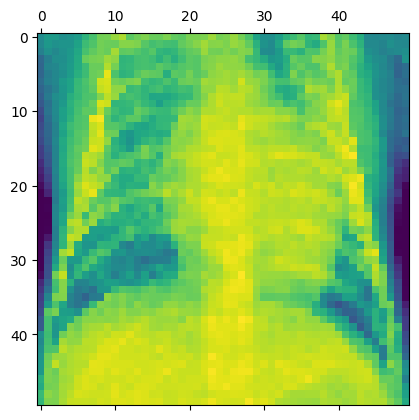

In [9]:
plt.matshow(X[2]) , Y[2]

In [10]:
Y[:5] , X.size , X.shape

(array([0, 1, 1, 1, 0]), 13080000, (5232, 50, 50))

In [11]:
X_scaled= X/255
X_scaled[0]

array([[0.03921569, 0.03137255, 0.03529412, ..., 0.03921569, 0.05490196,
        0.05490196],
       [0.        , 0.01568627, 0.        , ..., 0.01568627, 0.02352941,
        0.04705882],
       [0.        , 0.        , 0.        , ..., 0.02352941, 0.03529412,
        0.02745098],
       ...,
       [0.        , 0.        , 0.        , ..., 0.60784314, 0.44313725,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.58431373, 0.45490196,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.11372549, 0.00392157,
        0.        ]])

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pickle

In [16]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [19]:
from keras.api._v2.keras import activations
cnn = models.Sequential([
    #data_augmentation,
    layers.Conv2D(filters=20, kernel_size=(3,3), activation="relu", input_shape=(50,50,1)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(.5),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(.5),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(.5),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(.5),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(2, activation="softmax")

])

cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics= ["accuracy"])

In [29]:
cnn.fit(X_scaled,Y,epochs=15,batch_size=32)

Epoch 1/15
164/164 [==============================] - 19s 115ms/step - loss: 0.1305 - accuracy: 0.9499
Epoch 2/15
164/164 [==============================] - 19s 115ms/step - loss: 0.1438 - accuracy: 0.9463
Epoch 3/15
164/164 [==============================] - 17s 106ms/step - loss: 0.1287 - accuracy: 0.9520
Epoch 4/15
164/164 [==============================] - 17s 106ms/step - loss: 0.1327 - accuracy: 0.9524
Epoch 5/15
164/164 [==============================] - 19s 115ms/step - loss: 0.1351 - accuracy: 0.9455
Epoch 6/15
164/164 [==============================] - 17s 106ms/step - loss: 0.1403 - accuracy: 0.9442
Epoch 7/15
164/164 [==============================] - 18s 111ms/step - loss: 0.1276 - accuracy: 0.9518
Epoch 8/15
164/164 [==============================] - 18s 110ms/step - loss: 0.1333 - accuracy: 0.9480
Epoch 9/15
164/164 [==============================] - 17s 106ms/step - loss: 0.1251 - accuracy: 0.9555
Epoch 10/15
164/164 [==============================] - 19s 115ms/step - l

In [30]:
pickle.dump(cnn, open("x_ray.pkl", "wb"))

In [31]:
import matplotlib.pyplot as plt
predict=cnn.predict(x_test_scaled,batch_size=32)


20/20 [==============================] - 1s 39ms/step


1/1 [==============================] - 0s 32ms/step


1

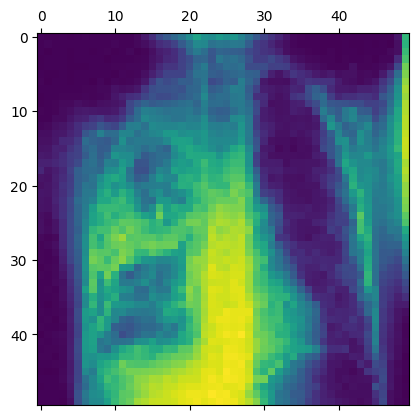

In [32]:
img= "/content/pneumonia.jpg"

img_r= cv2.imread(img)
imgg=cv2.resize(img_r,(50,50))
image = cv2.cvtColor(imgg, cv2.COLOR_BGR2GRAY )

plt.matshow(image)
img_np= np.array(image)
image_s= img_np/255


img_final=image_s.reshape(1,50,50)
img_final.shape
np.argmax(cnn.predict(img_final,batch_size=32))

In [33]:
cnn.evaluate(x_test_scaled,test_y)

20/20 [==============================] - 1s 26ms/step - loss: 0.2290 - accuracy: 0.9087


[0.22904828190803528, 0.9086538553237915]

In [34]:
predicts = [np.argmax (i) for i in predict]
predicts[:5] , test_y[:5]
#len(predicts), len(Y)

([1, 0, 0, 1, 0], array([1, 0, 0, 1, 0]))

In [35]:
cm= tf.math.confusion_matrix(labels=test_y,predictions=predicts)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[187,  47],
       [ 10, 380]], dtype=int32)>

<Axes: >

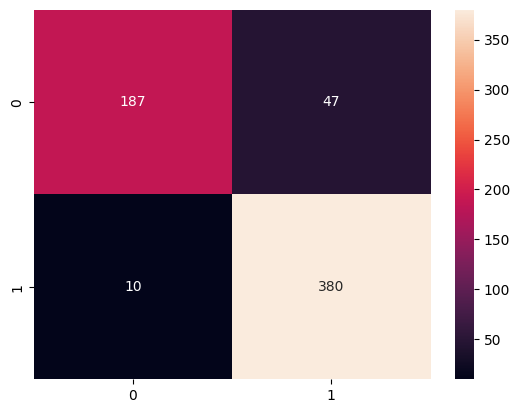

In [36]:
import seaborn as sns
sns.heatmap(cm ,annot=True, fmt="d")